<a href="https://colab.research.google.com/github/JoelAbadi/DI-Bootcamp/blob/main/Daily_challenge_W3_D3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import files
uploaded = files.upload()  # Upload the ZIP file here (e.g., Data Science Job Salary dataset.zip)


Saving Data Science Job Salary dataset.zip to Data Science Job Salary dataset (1).zip


In [13]:
import zipfile

with zipfile.ZipFile("Data Science Job Salary dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("ds_data")  # Extract contents into "ds_data" folder


In [14]:
import os

for root, dirs, files in os.walk("ds_data"):
    for file in files:
        if file.endswith(".csv"):
            print(os.path.join(root, file))  # This will give you the correct path to use


ds_data/Data Science Job Salary dataset/datascience_salaries.csv


In [15]:
import pandas as pd

file_path = "ds_data/Data Science Job Salary dataset/datascience_salaries.csv"  # Update if different
df = pd.read_csv(file_path)
df.head()


,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000


In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['salary_normalized'] = scaler.fit_transform(df[['salary']])
df[['salary', 'salary_normalized']].head()


,salary,salary_normalized
0,149000,0.601010
1,120000,0.454545
2,68000,0.191919
3,120000,0.454545
4,149000,0.601010


In [17]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df.select_dtypes(include=['object']), drop_first=True)

# Combine with numerical columns
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_ready = pd.concat([df_numeric, df_encoded], axis=1)


In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2 components
df_pca = pca.fit_transform(df_ready)

# Create a DataFrame with the PCA results
df_pca_result = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca_result.head()


,PCA1,PCA2
0,84163.766084,-949.193386
1,55163.767133,-941.138557
2,3163.768475,-929.281609
3,55163.767551,-939.138558
4,84163.767127,-944.193388


In [19]:
# Group by experience_level
salary_stats = df.groupby('experience_level')['salary'].agg(['mean', 'median']).reset_index()
salary_stats.columns = ['Experience Level', 'Average Salary', 'Median Salary']
salary_stats


,Experience Level,Average Salary,Median Salary
0,Entry,36111.111111,30000.0
1,Executive,76076.923077,46000.0
2,Mid,51786.885246,51000.0
3,Senior,75088.033012,68000.0


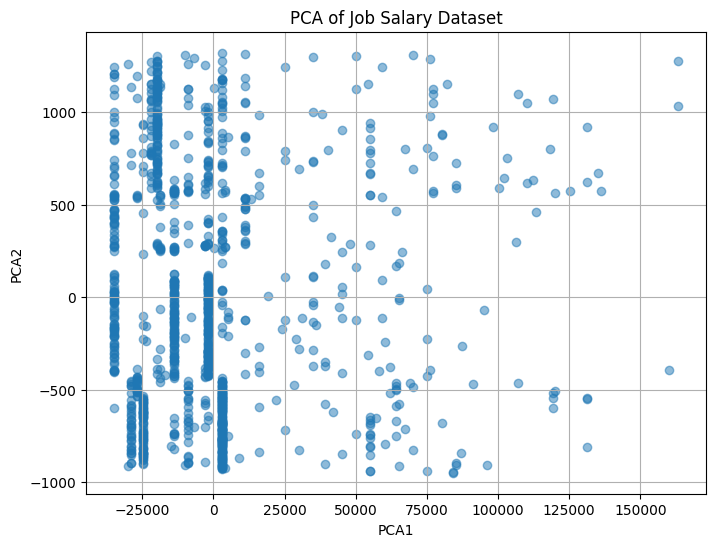

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df_pca_result['PCA1'], df_pca_result['PCA2'], alpha=0.5)
plt.title("PCA of Job Salary Dataset")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)
plt.show()


In [21]:
df.to_excel("cleaned_ds_salary.xlsx", index=False)
